## Astrodinámica para Ingeniería Aeroespacial
### Prof. Jorge I. Zuluaga
### Instituto de Física - Universidad de Antioquia

## Clase 1 - Repaso de Mecánica Celeste (parte 1)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-01-astrodyn-repaso_celeste_1
.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Antes de comenzar

In [23]:
import matplotlib.pyplot as plt

# Esto solo se tiene que correr en VisualCode
import sys
if 'google.colab' not in sys.modules:
    # Para que funcione en visual code instalar ipympl
    %matplotlib widget
    %matplotlib widget 

### El problema de los dos cuerpos

- Antes de comenzar a explorar las aplicaciones de la mecánica celeste para el estudio del movimiento de vehículos espaciales (mecánica orbital), debemos recoger algunos de los resultados más importantes de la teoría que nos serviran como base para lo que queda del curso. 

- La teoría básica está explicada en [la presentación preparada por el profesor](https://docs.google.com/presentation/d/1ydVbIC0StjwfBydEO5Ds_16rixlHTvmXhl__lBXavnM/edit?usp=sharing). Aquí solamente recogeremos algunos elementos prácticos.

- Para empezar con nuestros experimentos estudiemos un sistema formado por un cuerpo muy masivo y un satélite de masa despreciable.

- Nuestro sistema tiene en el origen de coordenadas a la Tierra como cuerpo central y un *satélite* con una masa despreciable comparada con la Tierra con estas coordenadas iniciales:

  $$
  \vec r : (10 000,0,0)\;\mathrm{km}\\
  \vec v : (1,7,0.2)\;\mathrm{km/s}\\ 
  $$


#### El problema de los dos cuerpos en `rebound`

- Estudiemos un sistema de dos cuerpos usando una de las herramientas más importantes de este curso: el paquete `rebound`.


- Para empezar instalemos e importemos el paquete:

In [3]:
!pip install -Uq rebound
import rebound as rb

- Lo primero que debemos hacer en `rebound` es *instanciar* el objeto que lleva a cabo la simulación:

In [4]:
sim = rb.Simulation()

- Una vez instanciado podemos modificar sus atributos o realizar acciones (simular, calcular los elementos orbitales, etc.)
- Por ejemplo, se pueden fijar las unidades con las que vamos a introducir las condiciones iniciales:

In [5]:
sim.units = ('km', 'mearth', 's') 

- `rebound` contiene una serie de unidades predefinidas que pueden ser consultadas usando las rutinas del módulo `units`:

In [6]:
from rebound import units
units.lengths_SI, units.masses_SI, units.times_SI

({'m': 1.0,
  'cm': 0.01,
  'km': 1000.0,
  'au': 149597870700.0,
  'aus': 149597870700.0,
  'pc': 3.085677581e+16,
  'parsec': 3.085677581e+16},
 {'kg': 1.0,
  'g': 0.001,
  'gram': 0.001,
  'msun': 1.9884754159665356e+30,
  'solarmass': 1.9884754159665356e+30,
  'sunmass': 1.9884754159665356e+30,
  'msolar': 1.9884754159665356e+30,
  'mmercury': 3.301096181046679e+23,
  'mvenus': 4.867466257521637e+24,
  'mearth': 5.972365261370795e+24,
  'mmars': 6.417120205436417e+23,
  'mjupiter': 1.8981872396165582e+27,
  'msaturn': 5.683361227113286e+26,
  'muranus': 8.681273407389496e+25,
  'mneptune': 1.0241260971459244e+26,
  'mpluto': 1.3029718219752756e+22,
  'massist': 6.719815405680768e+33},
 {'s': 1.0,
  'hr': 3600.0,
  'day': 86400.0,
  'days': 86400.0,
  'd': 86400.0,
  'yr': 31557600.0,
  'year': 31557600.0,
  'years': 31557600.0,
  'yrs': 31557600.0,
  'jyr': 31557600.0,
  'sidereal_yr': 31558149.7635,
  'yr2pi': 5022642.89091303,
  'kyr': 31557600000.0,
  'myr': 31557600000000.0,
  

Como ven son diccionarios. Ustedes pueden usar estos diccionarios para recuperar un valor. Por ejemplo la masa del sol:

In [7]:
units.masses_SI['msun']

1.9884754159665356e+30

- Es tiempo de agregar las partículas a nuestro sistema:

In [8]:
# Cuerpo central (la Tierra)
sim.add(m=1.0)

# Satélite
sim.add(m=0, x=10000, vx=1.0, vy=7.0, vz=0.2)

- Nótese que las propiedades que no se indican, por ejemplo las posiciones y velocidades del cuerpo mayor, o la coordenada $y$, $z$ del satélite, se asumen iguales a 0.

- Una importante propiedad del sistema es el valor que, en las unidades escogidas tiene la constante de gravitación:

In [9]:
sim.G

398600.435436096

- Usando este valor y la masa del cuerpo central, que en las unidades escogidas es $M = 1$ el parámetro gravitacional del sistema $\mu = G M$ será:

In [10]:
mu = sim.G * 1.0
mu

398600.435436096

- `rebound` nos permite previsualizar el estado del sistema usando:

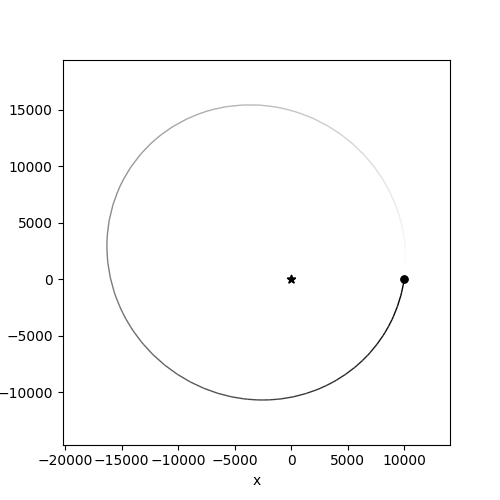

In [11]:
rb.OrbitPlot(sim)

- Es importante entender que está no necesariamente es la trayectoria del sistema. Es solo una representación de la posición sobre el plano x-y de la partículas (la estrella representa el cuerpo central) y el trazo indica la que sería la trayectoria si el problema fuera completamente kepleriano (problema de los dos cuerpos). 

- Como en nuestro caso, efectivamente solo tenemos dos cuerpos, la trayectoria mostrada es la *órbita osculatriz*.

#### Los elementos orbitales

- Podemos obtener a partir del vector de estado, los elementos orbitales de está partícula usando:

In [12]:
orbitas = sim.orbits()
orbitas

[<rebound.Orbit instance, a=13429.894402423799 e=0.28966511979112547 inc=0.028563657838755654 Omega=0.0 omega=5.631515837237298 f=0.6516694699422878>]

- Nótese que el método devuelve una lista con las órbitas respecto al cuerpo central. Como en este caso solo hay un satélite, la lista solo contiene un elemento.

- Podemos imprimir los elementos orbitales usando:

In [13]:
import numpy as np
rad = 180/np.pi

print(f"Semieje mayor: a = {orbitas[0].a} km")
print(f"Excentricidad: e = {orbitas[0].e}")
print(f"Inclinación: I = {orbitas[0].inc*rad} grados")
print(f"Longitud del nodo ascendente: Omega = {orbitas[0].Omega*rad} grados")
print(f"Argumento del periapsis: omega = {orbitas[0].omega*rad} grados")
print(f"Anomalía verdadera: f = {orbitas[0].f*rad} grados")

Semieje mayor: a = 13429.894402423799 km
Excentricidad: e = 0.28966511979112547
Inclinación: I = 1.6365770416164696 grados
Longitud del nodo ascendente: Omega = 0.0 grados
Argumento del periapsis: omega = 322.66208973477944 grados
Anomalía verdadera: f = 37.33791026522055 grados


#### Predicción de estado futuro

- Podemos obtener la posición del cuerpo en cualquier momento del futuro. Por ejemplo, si queremos calcular el vector de estado en $t = 1000$ segundos usamos: 

In [14]:
sim.integrate(1000)

- Miremos el estado del sistema en ese momento:

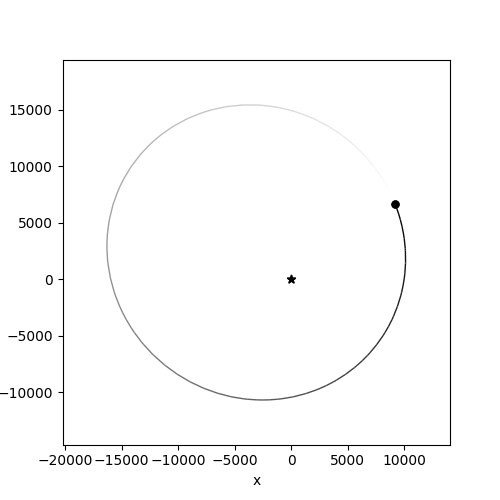

In [15]:
rb.OrbitPlot(sim)

- Podemos obtener las propiedades de la partícula usando los objetos `particles`:

In [16]:
sat = sim.particles[1]
sat

<rebound.particle.Particle object at 0x7f119b24afc0, m=0.0 x=9213.15912092312 y=6615.725281565219 z=189.02072233043486 vx=-2.3208693696944325 vy=5.93127342298924 vz=0.16946495494254973>

- Por ejemplo la posición se puede obtener con:

In [17]:
sat.xyz

[9213.15912092312, 6615.725281565219, 189.02072233043486]

- O las coordenadas individualmente: 

In [18]:
sat.x, sat.y

(9213.15912092312, 6615.725281565219)

- Lo mismo pasa con la velocidad:

In [19]:
sat.vx, sat.vy, sat.vz

(-2.3208693696944325, 5.93127342298924, 0.16946495494254973)

- Menos trivial es saber que `rebound` permite también obtener los elementos orbitales directamente a partir del objeto `particle`: 

In [20]:
sat.a, sat.f*rad

(13429.8944024238, 73.03011139963573)

- Vemos aquí que al avanzar el tiempo la anomalía media se ha modificado respecto al valor inicial.

#### La trayectoria en el tiempo

- Para obtener el vector de estado del sistema en 1000 puntos entre $t = 0$ s y $t = 500$ min, podemos usar:

In [38]:
import numpy as np
Nt = 100
xs = np.zeros((Nt, 6))
for i,t in enumerate(np.linspace(0, 500*60, Nt)):
    sim.integrate(t)
    xs[i,:3] = sat.xyz
    xs[i,3:] = sat.vxyz

- Nótese como hemos tenido que multiplicar el tiempo en minutos por el factor 60 para tener el tiempo en segundos que son las unidades que usa nuestra simulación.

- Una representación gráfica de las posiciones calculadas, proyectadas sobre el plano x-y es:

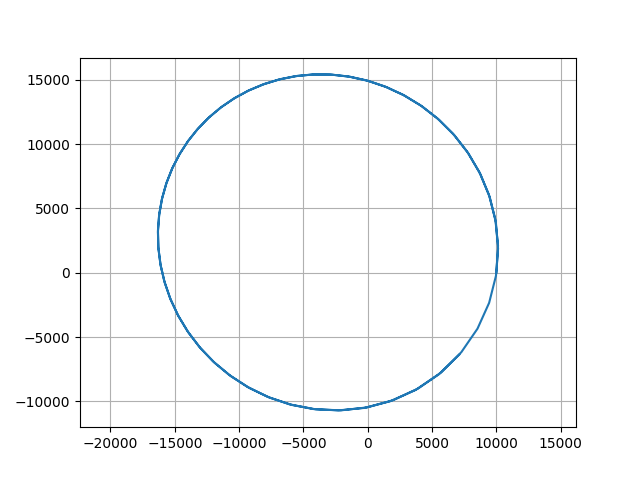

In [40]:
plt.figure()
plt.plot(xs[:,0], xs[:,1])
plt.axis('equal')
plt.grid()
plt.show()

- También podemos hacer una gráfica de la trayectoria en 3D:

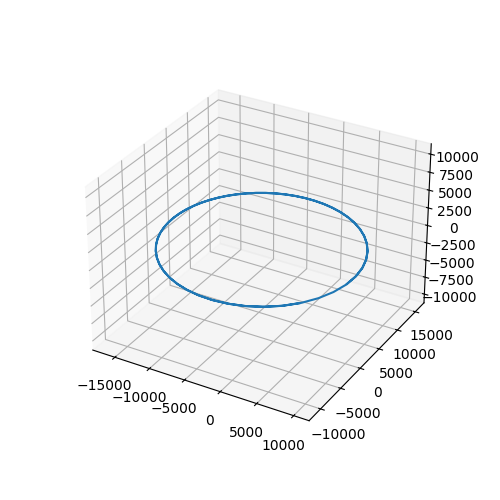

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs[:,0], xs[:,1], xs[:,2])
ax.axis('equal');

O lo podemos representar en el espacio usando `plotly`:

In [42]:
import plotly.express as px

px.scatter_3d(x=xs[:,0], y=xs[:,1], z=xs[:,2])

- Como puede verse las escalas de los ejes no son iguales y sería bueno que saliera la superficie de la Tierra. 

- Probemos con un código un poco más sofisticado:

In [60]:
import plotly.graph_objects as go

puntos = go.Scatter3d(x=xs[:,0], y=xs[:,1], z=xs[:,2], mode='lines')

def esfera(radius=6371, num=100):
    u1 = np.linspace(0, 2*np.pi, num)
    v1 = np.linspace(0, np.pi, num)
    uu, vv = np.meshgrid(u1, v1)
    xx = radius*np.cos(uu)*np.sin(vv)
    yy = radius*np.sin(uu)*np.sin(vv)
    zz = radius*np.cos(vv)
    surface = go.Surface(x=xx, y=yy, z=zz, surfacecolor=0*zz, opacity=0.3, showscale=False)
    return surface

fig = go.Figure()

fig.add_trace(puntos)
fig.add_trace(esfera())
fig.update_layout(width=700, height=500)

fig.show()


### El problema de los dos cuerpos con `SPICE`

- Todo lo que hicimos con `rebound` puede hacerse también usando `SPICE`. 

- `SPICE` es un sistema de información y una librería de rutinas extremadamente útil y usado en mecánica celeste. Viene para distintos lenguajes. En Python existe `spiceypy` que empaqueta las rutinas del sistema:

In [64]:
!pip install -Uq spiceypy
import spiceypy as spy

#### Elementos orbitales usando `SPICE`

- Se pueden obtener los elementos orbitales con `spiceypy` usando:

In [65]:
X = [10000,0,0,1,7,0.2]
elts = spy.oscelt(X,0,mu)
elts

array([9.53972243e+03, 2.89665120e-01, 2.85636578e-02, 0.00000000e+00,
       5.63151584e+00, 3.54704481e-01, 0.00000000e+00, 3.98600435e+05])

- El orden en el que vienen los elementos orbitales se puede obtener de la documentación de esta rutina (ver https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/oscelt_c.html):

    ```
    rp      Perifocal distance.
    ecc     Eccentricity.
    inc     Inclination.
    lnode   Longitude of the ascending node.
    argp    Argument of periapsis.
    m0      Mean anomaly at epoch.
    t0      Epoch.
    mu      Gravitational parameter.
    ```

- De modo que podemos imprimir:

In [66]:
import numpy as np
rad = 180/np.pi

print(f"Distancia al periapsis: q = {elts[0]} km")
print(f"Excentricidad: e = {elts[1]}")
print(f"Inclinación: I = {elts[2]*rad} grados")
print(f"Longitud del nodo ascendente: Omega = {elts[3]*rad} grados")
print(f"Argumento del periapsis: omega = {elts[4]*rad} grados")
print(f"Anomalía media: M = {elts[5]*rad} grados")

Distancia al periapsis: q = 9539.722431563543 km
Excentricidad: e = 0.28966511979112575
Inclinación: I = 1.636577041616718 grados
Longitud del nodo ascendente: Omega = 0.0 grados
Argumento del periapsis: omega = 322.6620897347795 grados
Anomalía media: M = 20.32306974345203 grados


- Que coincide con lo que habíamos obtenido con `rebound`.

- La principal diferencia entre `rebound` y `spiceypy` es que mientras el primero obtiene las cantidades con procedimientos numéricos (integrando numéricamente las ecuaciones de movimiento del problema de los N-cuerpos), `SPICE` calcula las cantidades usando una teoría casi completamente analítica y que se basa exclusivamente en el problema de los dos cuerpos.

#### Predicción de posiciones futuras usando `SPICE`

- Existen dos maneras de calcular las posiciones futuras de una partícula en el problema de los dos cuerpos usando `SPICE`:

  - Con la rutina `prop2b`: esta rutina utiliza como entradas el valor inicial del vector de estado y el parámetro gravitacional del sistema $\mu$. 

  - Con la rutina `conics`: esta rutina usa como entradas los elementos orbitales.
Calcular las posiciones futuras:


- `prop2b` es el más sencillo:

In [74]:
spy.prop2b(mu,X,1000)

array([ 9.21315912e+03,  6.61572528e+03,  1.89020722e+02, -2.32086937e+00,
        5.93127342e+00,  1.69464955e-01])

- Podemos compararlo con lo que habíamos obtenido con `rebound`

In [69]:
sim.integrate(1000)
sim.particles[1]

<rebound.particle.Particle object at 0x7f117ce5d8c0, m=0.0 x=9213.159120923166 y=6615.725281565076 z=189.02072233043074 vx=-2.3208693696943756 vy=5.9312734229892845 vz=0.16946495494255104>

- `conics` es un poco más complicado pero puede ser útil cuando lo que se conoce no es el vector de estado sino los elementos orbitales:

In [73]:
spy.conics(elts,1000)

array([ 9.21315912e+03,  6.61572528e+03,  1.89020722e+02, -2.32086937e+00,
        5.93127342e+00,  1.69464955e-01])

- Nótese que en este caso se paso el vector con los elementos orbitales que habíamos obtenido antes.

- Usando estas herramientas podemos reconstruir lo que habíamos hecho antes con `rebound` 

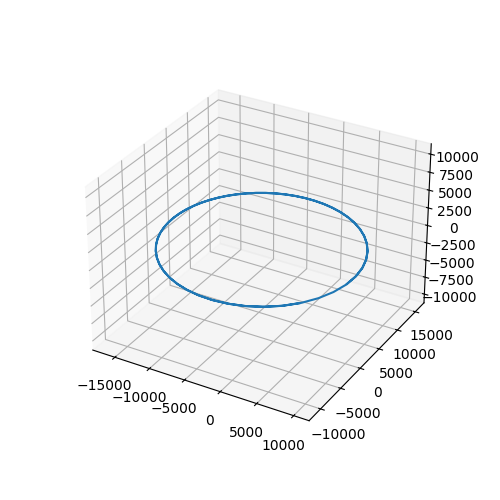

In [76]:
import numpy as np
Nt = 100
xs = np.zeros((Nt, 6))
for i,t in enumerate(np.linspace(0, 500*60, Nt)):
    xs[i] = spy.prop2b(mu,X,t)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs[:,0], xs[:,1], xs[:,2])
ax.axis('equal');

### Para saber más

Consulte el repositorio en línea del curso para otro material.

<hr/>

*Los cuadernos de clase del curso de astrodinámica también están [disponibles en línea](https://github.com/seap-udea/notas-astrodyn).*